# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU, ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado?¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Los datos son los siguientes:

'Avg. Area Income': Ingresos medios de los residentes en la localizacion.
'Avg. Area House Age': Antiguedad media de las casas en la ciudad.
'Avg. Area Number of Rooms': Media de habitaciones por casa en la zona.
'Avg. Area Number of Bedrooms': Media de dormitorios por casa en la zona.
'Area Population': Poblacion de la zona en la que se localiza la casa.
'Price': Precio de la casa.
'Address': Direccion postal de la casa.

Datos adaptados de:
https://github.com/bcbarsness/machine-learning/blob/master/USA_Housing.csv

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Agrupación del conjunto de datos de vivienda de EE. UU.
En este cuaderno, prepararemos un script para el conjunto de datos de vivienda de EE. UU.


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
sns.set_style('whitegrid')

<ipython-input-93-ea56ddd27c41>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Cargar los datos


In [131]:
import pandas as pd

#delete the last column Address
archivo_Housing = 'USA_Housing.csv'
USAHousing = pd.read_csv(archivo_Housing)
USAHousing = USAHousing.drop(columns=['Address'])
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [132]:
USAHousing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [133]:
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


## Análisis exploratorio de datos
Una forma rápida de obtener una descripción general de los datos es mostrar un diagrama de dispersión que muestre la relación entre las características y nuestro objetivo (precio).

In [134]:
USAHousing["Price"]

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

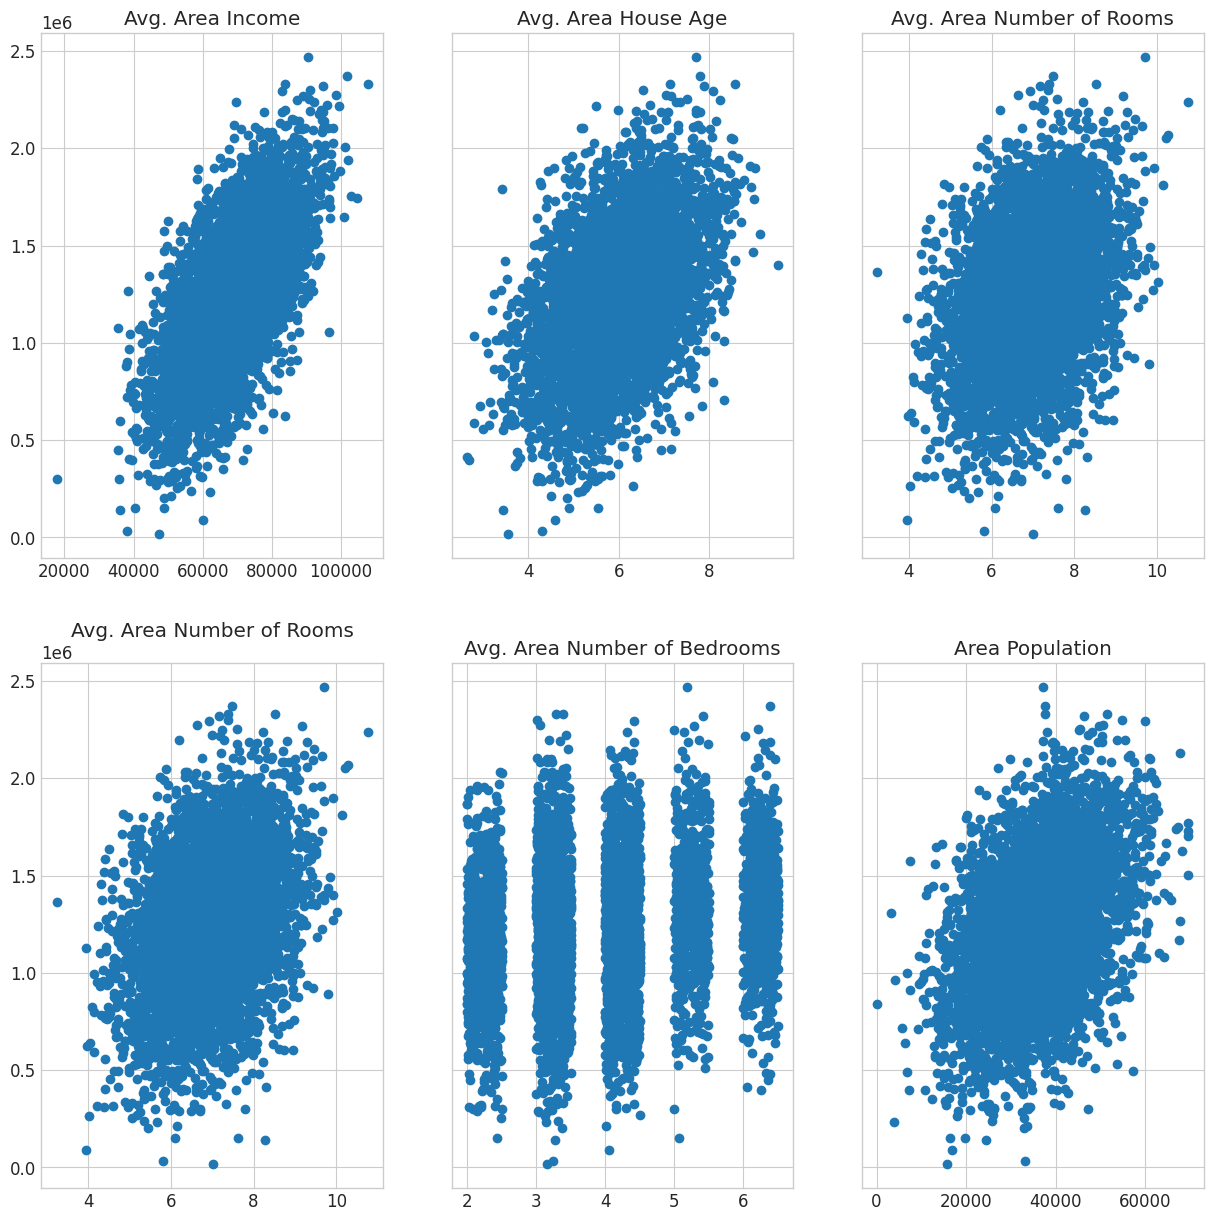

In [99]:
rows = 2
cols = 3
fig, axarr = plt.subplots(rows, cols, figsize=(15, 15), sharey=True)
for i in range(rows):
    for j in range(cols):
        idx = i * rows + j
        if idx < len(USAHousing.columns):
          axarr[i, j].scatter(USAHousing.to_numpy()[:, idx],USAHousing["Price"])
          axarr[i, j].set_title(USAHousing.columns[idx])

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

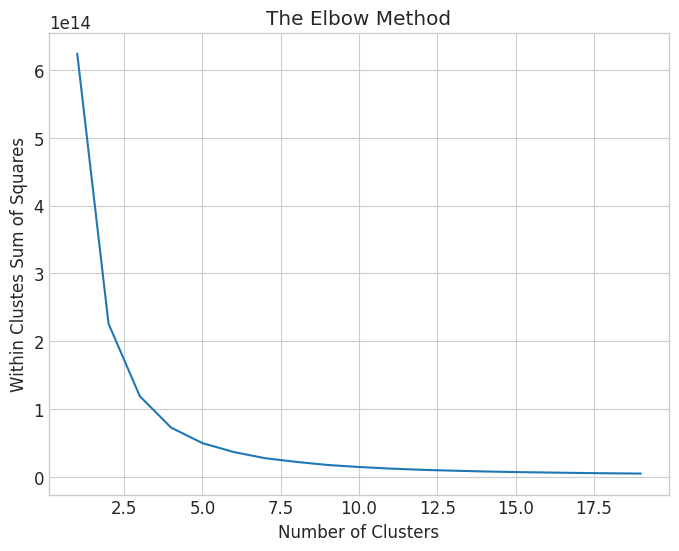

In [135]:
from sklearn.cluster import KMeans
inercias = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(USAHousing)
    inercias.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1,20), inercias)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clustes Sum of Squares')
plt.show()

In [107]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
print("The first deviation points", pct_difs)

pct_dif_dif = np.diff(pct_difs)
print("The second deviation points", pct_dif_dif)

np.argmax(pct_dif_dif)

mejor_codo = np.argmax(pct_dif_dif)+2
print("The right number of centroid is :", mejor_codo)

The first deviation points [-1.76527205 -0.90078896 -0.63959809 -0.4591773  -0.35547277 -0.33678318
 -0.24960167 -0.26046001 -0.20633118 -0.19570373 -0.17444803 -0.14304245
 -0.14657549 -0.1255094  -0.10829907 -0.10868139 -0.10427549 -0.09961281]
The second deviation points [ 8.64483088e-01  2.61190870e-01  1.80420785e-01  1.03704530e-01
  1.86895898e-02  8.71815093e-02 -1.08583336e-02  5.41288264e-02
  1.06274529e-02  2.12556937e-02  3.14055829e-02 -3.53303489e-03
  2.10660883e-02  1.72103272e-02 -3.82316770e-04  4.40589312e-03
  4.66268147e-03]
The right number of centroid is : 2


In [108]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(USAHousing)

In [109]:
columns = np.append(USAHousing.columns,['Cluster'])
data = np.concatenate((USAHousing, y_kmeans.reshape(-1,1)), axis=1)
df_USAhousing = pd.DataFrame(data=data, columns=columns)

In [110]:
df_USAhousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Cluster
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,0.0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,0.0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,1.0
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,1.0
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,0.0
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,1.0
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,1.0


import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_486316537170276861, *['Avg. Area Income'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_486316537170276861, *['Avg. Area House Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_486316537170276861, *['Avg. Area Number of Rooms'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_486316537170276861, *['Avg. Area Number of Bedrooms'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_486316537170276861, *['Avg. Area Income'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_486316537170276861, *['Avg. Area House Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_486316537170276861, *['Avg. Area Number of Rooms'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_486316537170276861, *['Avg. Area Number of Bedrooms'], **{})
chart

import numpy as np
from google.colab import autoviz
df_486316537170276861 = autoviz.get_df('df_486316537170276861')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_486316537170276861, *[[['Avg. Area Income', 'Avg. Area House Age'], ['Avg. Area House Age', 'Avg. Area Number of Rooms'], ['Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms'], ['Avg. Area Number of Bedrooms', 'Area Population']]], **{})
chart

# clasificación usando 2 variables:

## PCA
A partir de la descripción del conjunto de datos, pudimos ver que consta de 13 características. Queremos visualizar los grupos en un espacio bidimensional. El análisis de componentes principales nos permite resumir un conjunto de datos con una cantidad menor de variables que colectivamente explican la mayor parte de la variabilidad de los datos.

Los resultados de un PCA dependen de si las variables se han escalado individualmente. Por lo general, escalamos cada variable para que tenga una desviación estándar de uno. Usamos el objeto StandardScaler para lograr esto. El método fit_transform se encargará de ajustar los datos al modelo y luego transformarlos para nosotros.

La clase `PCA` está disponible en el paquete `sklearn.decomposition`. Iniciamos el modelo asignando al parámetro `n_components` un valor de 2, ya que esa es la cantidad objetivo de dimensiones que queremos.

escalando los datos

In [116]:
## Scale the data using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(USAHousing,axis=0)

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

No hubo necesidad de dividir los datos en conjuntos de entrenamiento y prueba, ya que trabajaremos con aprendizaje no supervisado más adelante. Como resultado, podemos usar directamente el método fit_transform en nuestros datos escalados. El método devolverá dos nuevas dimensiones con sus valores correspondientes para cada valor de entrada.

In [118]:
X_pca = pca.fit_transform(dat_scaled)

Podemos ver la proporción de la varianza que cada componente puede explicar accediendo al atributo `explained_variance_ratio_`.

In [119]:
pca.explained_variance_ratio_

array([0.33393034, 0.23060361])

De los resultados podemos concluir que:
- El primer componente principal puede explicar el 33% de la varianza.
- El segundo componente principal puede explicar un 23% adicional de la varianza.
- Acumulativamente estos dos componentes explican el 56% de la varianza en los datos.

## Agrupación
El [algoritmo K-Means](https://en.wikipedia.org/wiki/K-means_clustering) se usa para particionar un conjunto de datos en K clústeres distintos que no se superponen. Para realizar el agrupamiento, debemos especificar la cantidad deseada de grupos, después de lo cual el algoritmo asignará cada observación exactamente a uno de los K grupos. En `Kmeans` especificamos el número deseado de clústeres al crear el objeto usando el parámetro `n_clusters`. Una forma de identificar una cantidad adecuada de clústeres para sus datos es utilizar el llamado [método del codo] (https://en.wikipedia.org/wiki/Elbow_method_(clustering)).

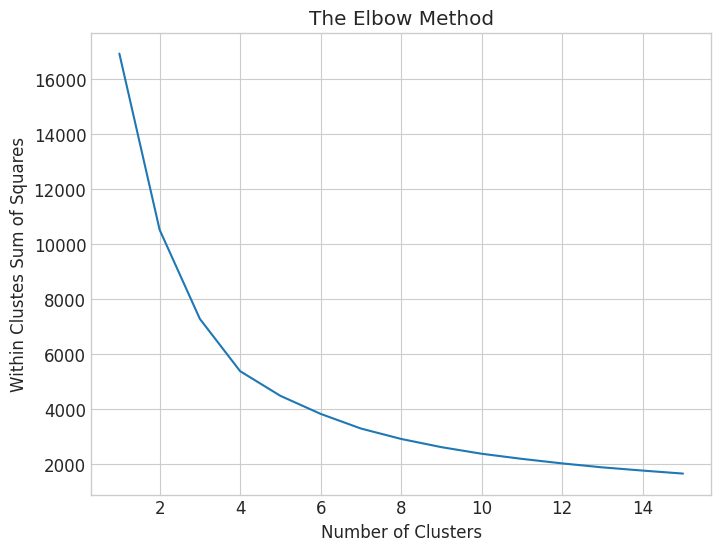

In [120]:
from sklearn.cluster import KMeans
inercias = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X_pca)
    inercias.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1,16), inercias)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clustes Sum of Squares')
plt.show()

In [121]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
print("The first deviation points", pct_difs)

pct_dif_dif = np.diff(pct_difs)
print("The second deviation points", pct_dif_dif)

np.argmax(pct_dif_dif)

mejor_codo = np.argmax(pct_dif_dif)+2
print("The right number of centroid is :", mejor_codo)

The first deviation points [-0.60902986 -0.44566897 -0.35387775 -0.20035545 -0.17196312 -0.16179645
 -0.13037044 -0.11424042 -0.10146318 -0.08513473 -0.081631   -0.07699944
 -0.06652065 -0.06593416]
The second deviation points [0.16336089 0.09179122 0.15352231 0.02839233 0.01016667 0.03142601
 0.01613002 0.01277725 0.01632845 0.00350372 0.00463156 0.01047879
 0.0005865 ]
The right number of centroid is : 2


In [122]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

## ## Preparar los conjuntos de datos
Hemos identificado los principales componentes y grupos de nuestro conjunto de datos, es hora de combinar todos los datos. Haremos esto creando dos conjuntos de datos diferentes.
- Conjunto de datos que contiene los datos originales de USA Housing, los componentes principales y la información del clúster.
- Conjunto de datos que contiene información sobre los componentes principales.

In [123]:
columns = np.append(USAHousing.columns,['PC 1', 'PC 2', 'Cluster'])
data = np.concatenate((USAHousing.to_numpy(), X_pca, y_kmeans.reshape(-1,1)), axis=1)
df_USAhousing = pd.DataFrame(data=data, columns=columns)

Echemos un vistazo a los datos para asegurarnos de que tiene sentido.

In [124]:
df_USAhousing.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,PC 1,PC 2,Cluster
907,57456.997164,5.378245,7.857343,6.22,37378.950893,1.061223e+06,-0.112396,2.197273,1.0
4286,61506.594775,6.411062,6.701059,3.13,53962.056327,1.271752e+06,0.090836,-0.924559,0.0
2113,64962.433002,7.352679,6.535796,3.41,17093.809804,9.060347e+05,-1.140305,-0.168635,1.0
1426,52988.029596,6.995184,7.098709,3.44,37791.017513,1.112314e+06,-0.593760,0.033279,1.0
269,59801.491029,4.210463,4.954387,2.03,33534.926403,3.111112e+05,-3.872268,-0.995449,1.0


El segundo conjunto de datos contendrá información sobre los componentes principales.



In [125]:
columns = np.append(USAHousing.columns,['VARRATIO'])
data = np.concatenate((pca.components_, pca.explained_variance_ratio_.reshape(-1,1)), axis=1)
df_pca = pd.DataFrame(data=data, columns=columns, index=['PC 1', 'PC 2'])

In [126]:
df_pca

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,VARRATIO
PC 1,0.428971,0.298385,0.349325,0.281174,0.257900,0.677755,0.333930
PC 2,-0.304817,-0.226230,0.604654,0.634264,-0.220659,-0.198288,0.230604


## Visualiza los datos
Finalmente visualizaremos los datos para que tengamos una referencia de que resultados debemos lograr.

**Componentes principales**

Muestre un mapa de calor de las características y cómo el peso de cada característica afecta el valor del componente principal. Cortamos la última columna de los datos porque era la razón de varianza explicada para el componente principal.

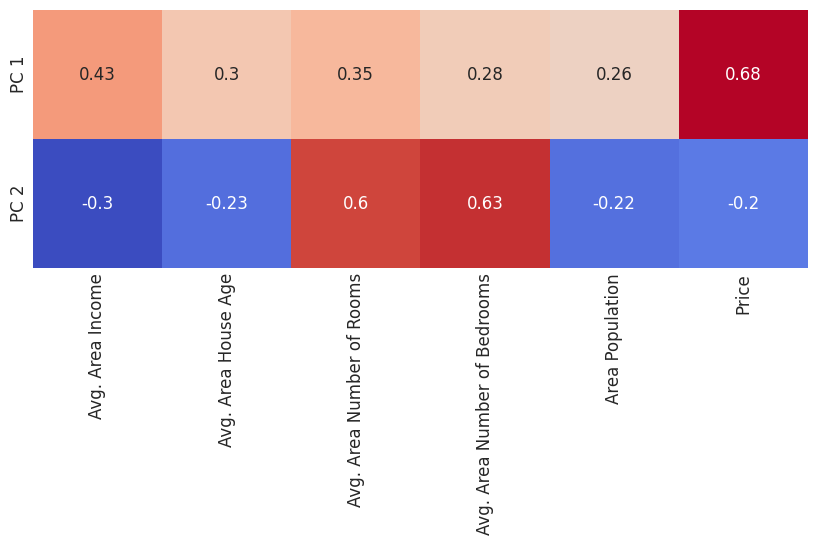

In [127]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
ax = sns.heatmap(df_pca.iloc[:,:-1], cmap='coolwarm', square=True, annot=True, cbar=False)

**Conglomerados por componentes principales**

Tracemos los conglomerados en un diagrama de dispersión donde usamos los componentes principales como ejes.

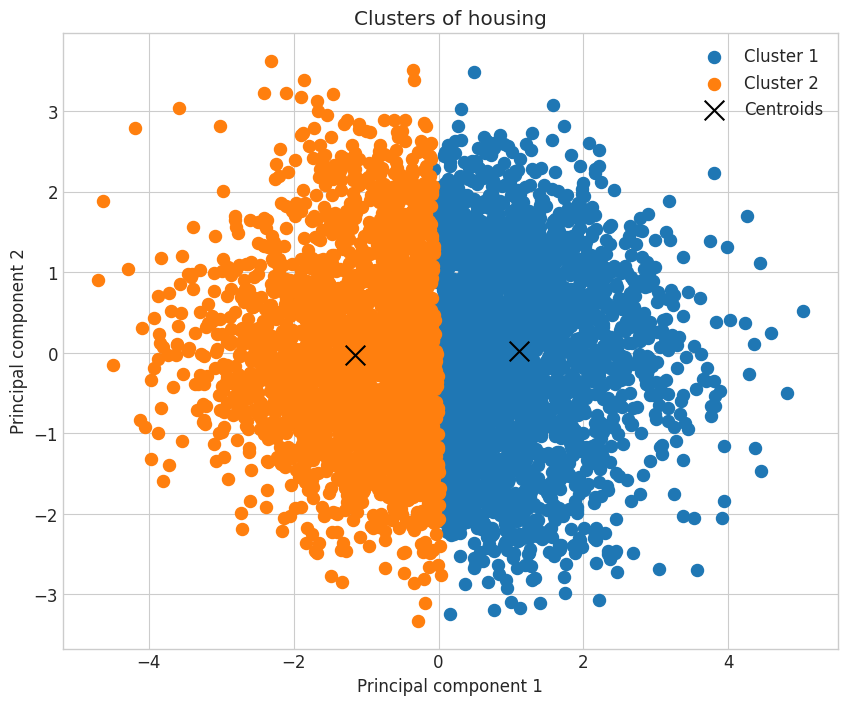

In [128]:
plt.figure(figsize=(10,8))
for i in range(kmeans.n_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s = 75, label = 'Cluster ' + str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of housing')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.show()

**Clusters por función**

Trace los grupos en un gráfico de dispersión para cada característica para ver si hay patrones notables.

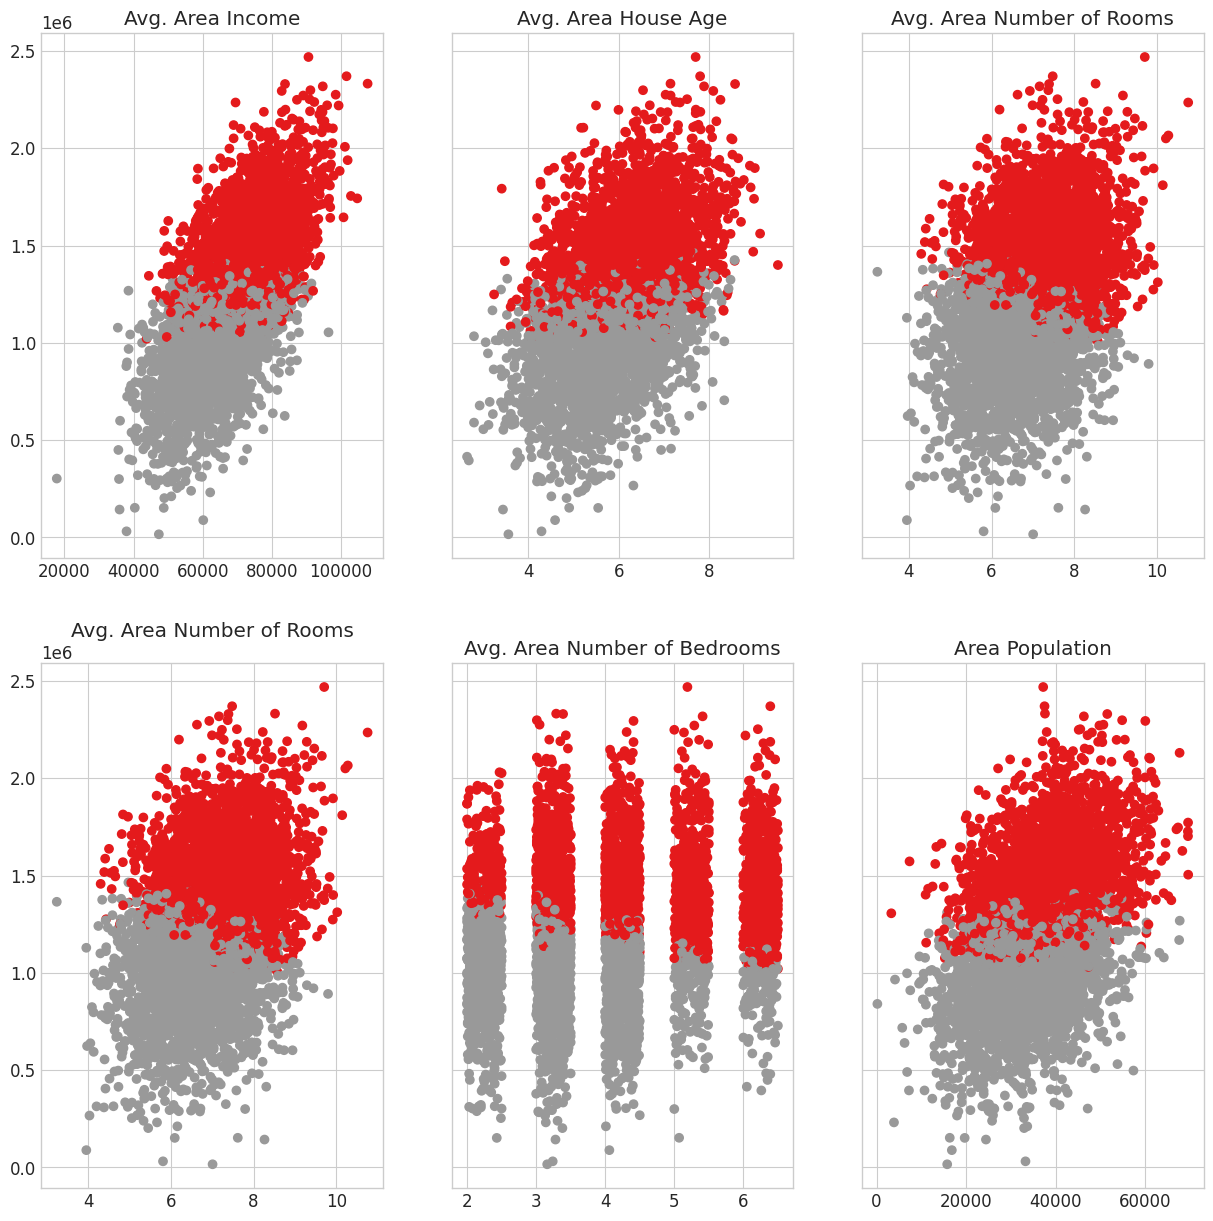

In [129]:
rows = 2
cols = 3
fig, axarr = plt.subplots(rows, cols, figsize=(15, 15), sharey=True)
for i in range(rows):
    for j in range(cols):
        idx = i * rows + j
        if idx < len(USAHousing.columns):
          axarr[i, j].scatter(USAHousing.to_numpy()[:, idx],USAHousing["Price"], c=y_kmeans, cmap='Set1')
          axarr[i, j].set_title(USAHousing.columns[idx])

**Estimación de la densidad del kernel del precio medio por clúster**

Trace un KDE del valor medio de las casas agrupadas por conglomerado.

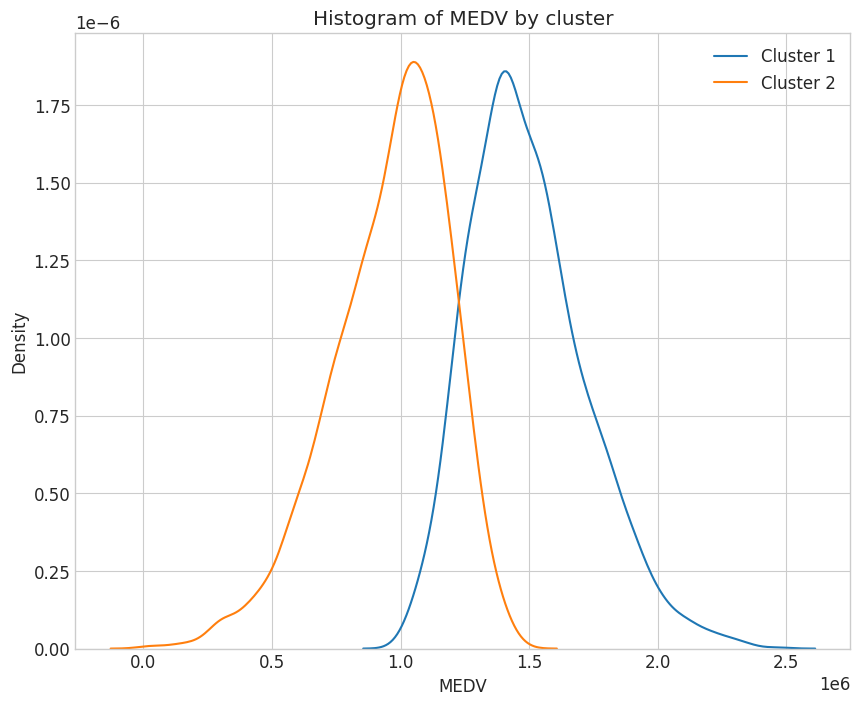

In [130]:
plt.figure(figsize=(10,8))
for i in range(kmeans.n_clusters):
    sns.kdeplot(USAHousing["Price"][y_kmeans == i], label='Cluster ' + str(i+1))
plt.title('Histogram of MEDV by cluster')
plt.xlabel('MEDV')
plt.legend()
plt.show()